In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('/Users/rutwikgudipati/Desktop/spam/spam.csv', encoding='latin-1')

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [12]:
df.sample(5)

,v1,v2
307,ham,Lol yes. Our friendship is hanging on a thread...
3481,spam,Do you want a NEW video phone750 anytime any n...
1135,ham,K do I need a login or anything
112,ham,I'm ok wif it cos i like 2 try new things. But...
3327,ham,No we put party 7 days a week and study lightl...


In [13]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
df.sample(5)

,target,text
5056,ham,Hey next sun 1030 there's a basic yoga course....
1063,spam,We have new local dates in your area - Lots of...
251,ham,"Wen ur lovable bcums angry wid u, dnt take it ..."
2028,ham,Kallis is ready for bat in 2nd innings
4227,ham,Have you started in skye


In [15]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

ModuleNotFoundError: No module named 'sklearn'

In [18]:
df['target']=encoder.fit_transform(df['target'])

NameError: name 'encoder' is not defined

In [18]:
df.isnull().sum()

,0
target,0
text,0


In [19]:
df.duplicated().sum()

403

In [21]:
df=df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

#EDA


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

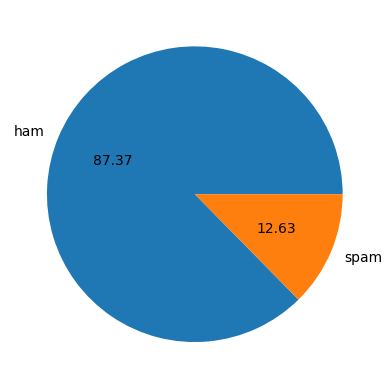

In [24]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

we can see that the data is imbalanced

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
df['num_char']=df['text'].apply(len)

In [29]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#ham_messages
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#spam_messages
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

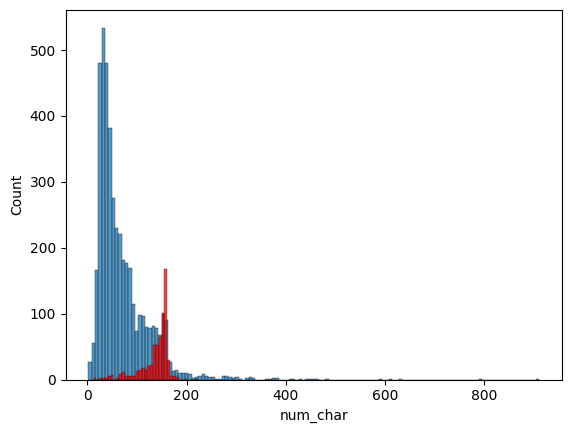

In [43]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

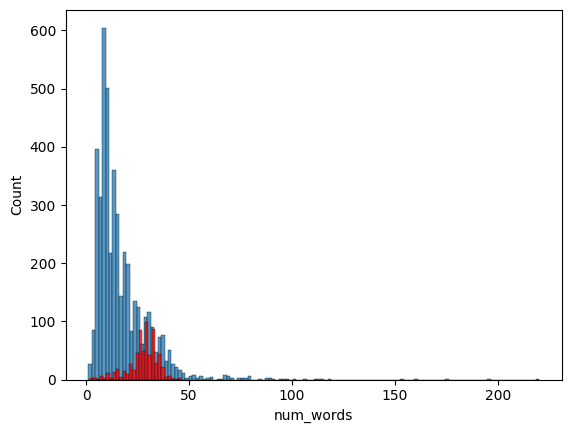

In [44]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

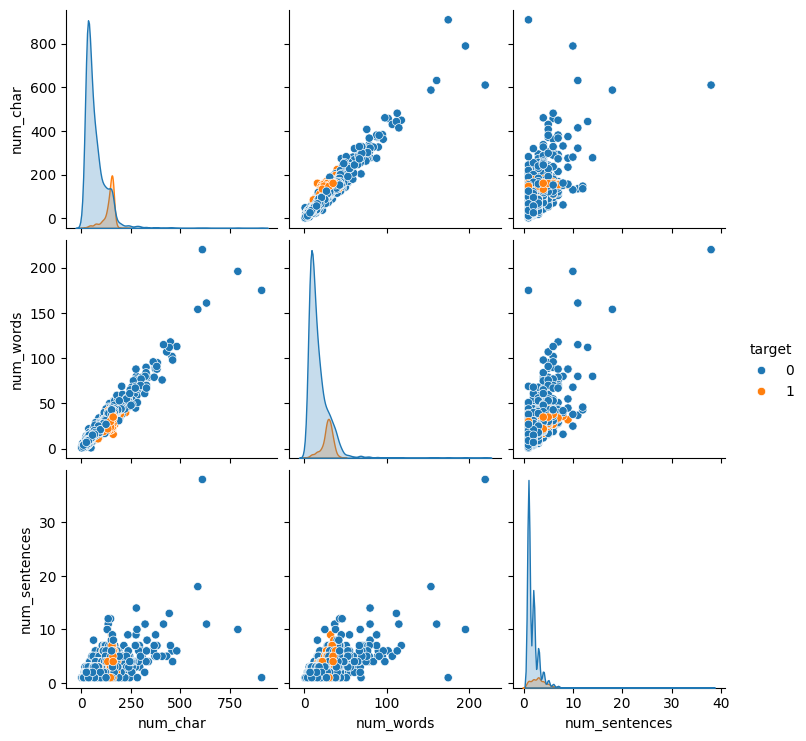

In [48]:
sns.pairplot(df,hue='target')

<Axes: >

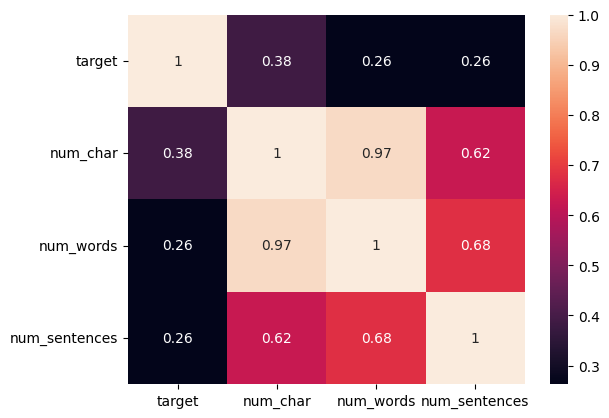

In [50]:
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True) # Select only numeric columns for correlation calculation

from the above heatmap we can observe that there is multi collinearity between words ,sentences and char as they are highly correlated,so we have to take one attribute out of the three and we can choose char as it is correlate dto the target better

#Text Preprocessing
lowercase
tokenization
removing special charecters
removing stopwords and punctuation
stemming









In [67]:
def preprocess_text(text):
    text=text.lower() # Call the lower method
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)


    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)



    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [69]:
preprocess_text('I LOVED the yt lectures')

'love yt lectur'

In [51]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [70]:
df['text'][12]

'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [71]:
preprocess_text(df['text'][12])

'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18'

In [72]:
df['transformed_text']=df['text'].apply(preprocess_text)

In [73]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


now we have to generate word cloud


In [79]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [80]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

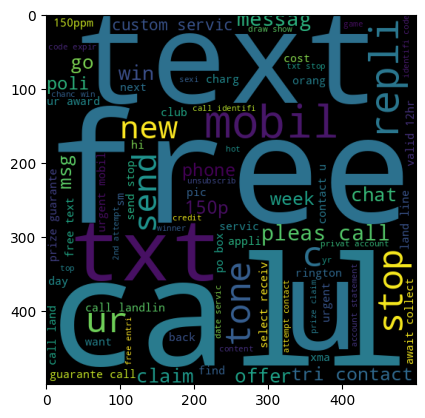

In [81]:
plt.imshow(spam_wc)

In [82]:
wc_ham=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

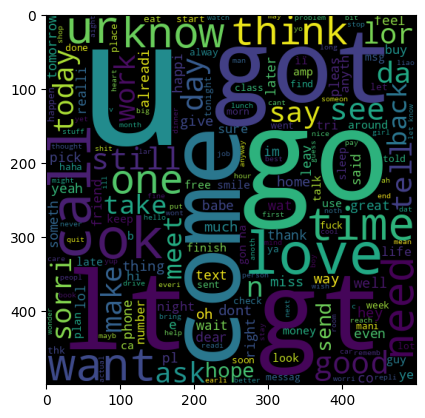

In [83]:
plt.imshow(wc_ham)

exploring top 30 words use din spam messages

In [84]:
spam=[]
for i in df[df['target']==1]['transformed_text'].tolist():
    for j in i.split():
        spam.append(j)

In [85]:
len(spam)

9939

In [86]:
from collections import Counter
pd.DataFrame(Counter(spam).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


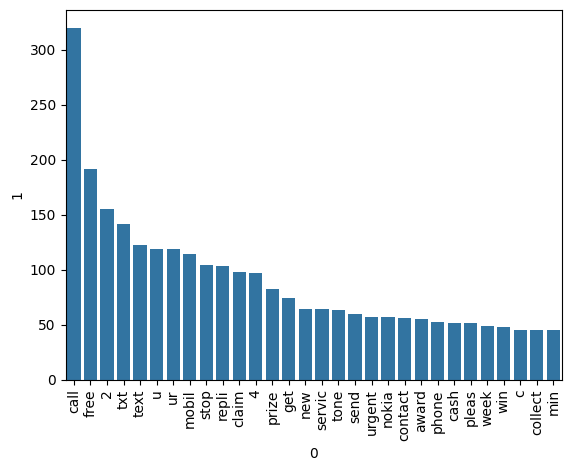

In [93]:
sns.barplot(x=pd.DataFrame(Counter(spam).most_common(30))[0],y=pd.DataFrame(Counter(spam).most_common(30))[1]) # Use named arguments x and y for the barplot
plt.xticks(rotation='vertical')
plt.show()

In [94]:
ham=[]
for i in df[df['target']==0]['transformed_text'].tolist():
    for j in i.split():
        ham.append(j)

In [96]:
len(ham)

35404

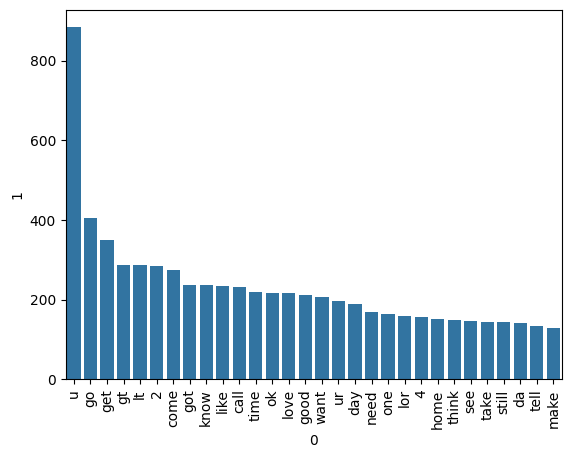

In [98]:
sns.barplot(x=pd.DataFrame(Counter(ham).most_common(30))[0],y=pd.DataFrame(Counter(ham).most_common(30))[1]) # Use named arguments x and y for the barplot
plt.xticks(rotation='vertical')
plt.show()

#Model Building

we will use bag of words to vectorize the text

In [142]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tf=TfidfVectorizer(max_features=3000)
cv=CountVectorizer()

In [143]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [144]:
X.shape

(5169, 6708)

In [145]:
y=df['target'].values

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [148]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [149]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

Now we will be

In [150]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [151]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [152]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Now checking with tfidf

In [153]:
X_tf=tf.fit_transform(df['transformed_text']).toarray()

In [154]:
y=df['target'].values

In [155]:
X_tf_train,X_tf_test,y_tf_train,y_tf_test=train_test_split(X_tf,y,test_size=0.2,random_state=2)

In [156]:
gnb.fit(X_tf_train,y_tf_train)
y_pred4=gnb.predict(X_tf_test)
print(accuracy_score(y_tf_test,y_pred4))
print(confusion_matrix(y_tf_test,y_pred4))
print(precision_score(y_tf_test,y_pred4))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [157]:
mnb.fit(X_tf_train,y_tf_train)
y_pred5=mnb.predict(X_tf_test)
print(accuracy_score(y_tf_test,y_pred5))
print(confusion_matrix(y_tf_test,y_pred5))
print(precision_score(y_tf_test,y_pred5))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [158]:
bnb.fit(X_tf_train,y_tf_train)
y_pred6=bnb.predict(X_tf_test)
print(accuracy_score(y_tf_test,y_pred6))
print(confusion_matrix(y_tf_test,y_pred6))
print(precision_score(y_tf_test,y_pred6))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


with the above metrics and the data being imbalanced, we can concludethat we can proceed with tfidf tokenization with multinomial naive bayes therom

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [161]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [162]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_tf_train,y_tf_train)
  y_pred=clf.predict(X_tf_test)
  accuracy=accuracy_score(y_tf_test,y_pred)
  precision=precision_score(y_tf_test,y_pred)

  return accuracy,precision


In [163]:
train_classifier(svc,X_tf_train,y_tf_train,X_tf_test,y_tf_test)

(0.9758220502901354, 0.9747899159663865)

In [164]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_tf_train,y_tf_train,X_tf_test,y_tf_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [140]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [165]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [166]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [141]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [167]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


so there is an improvement in precision in Naive Bayes

BEST MODEL IS MNB with TFIDF tokenization using max_features as 3000

In [169]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))